<center><h1>Cats and Dogs<j1><center>

#### What is the Dogs vs. Cats dataset

This is a dataset with 25000 pictures of cats and dogs

#### What is the goal if this Model?

We want to help a the pc to be able to diffrence between a Dog and a Cat.

### Feature description

There are no features we only get the pictures, so the goal is to turn the pictures we get into a dataFrame
with 2 kinds of features, pixel and Label

#### pixel1 - pixel???
each feature contain a number between 0 and 256 representing a color of the grayscale, all pixel togheter make the whole picture

#### Label
contains 0 or 1 while 0 represents a Dog and 1 a Cat.
The model will try to predict the label of each picture

## Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

## Get the Data

We only got an order filled with pictures of cats and dogs; so we will have to turn them into a dataframe

First Desicion about the dataFrame: the pictures will be in black and white,  i dont think the colors are going to help much in the case of cats and dogs because all colors we can find on cats we can find on dogs and other way around too. so we will go with black and white pictures

### First Look
Lets have a look at the pictures and then decide which size we want for the pictures,
All pictures are in black because recolor made some problems

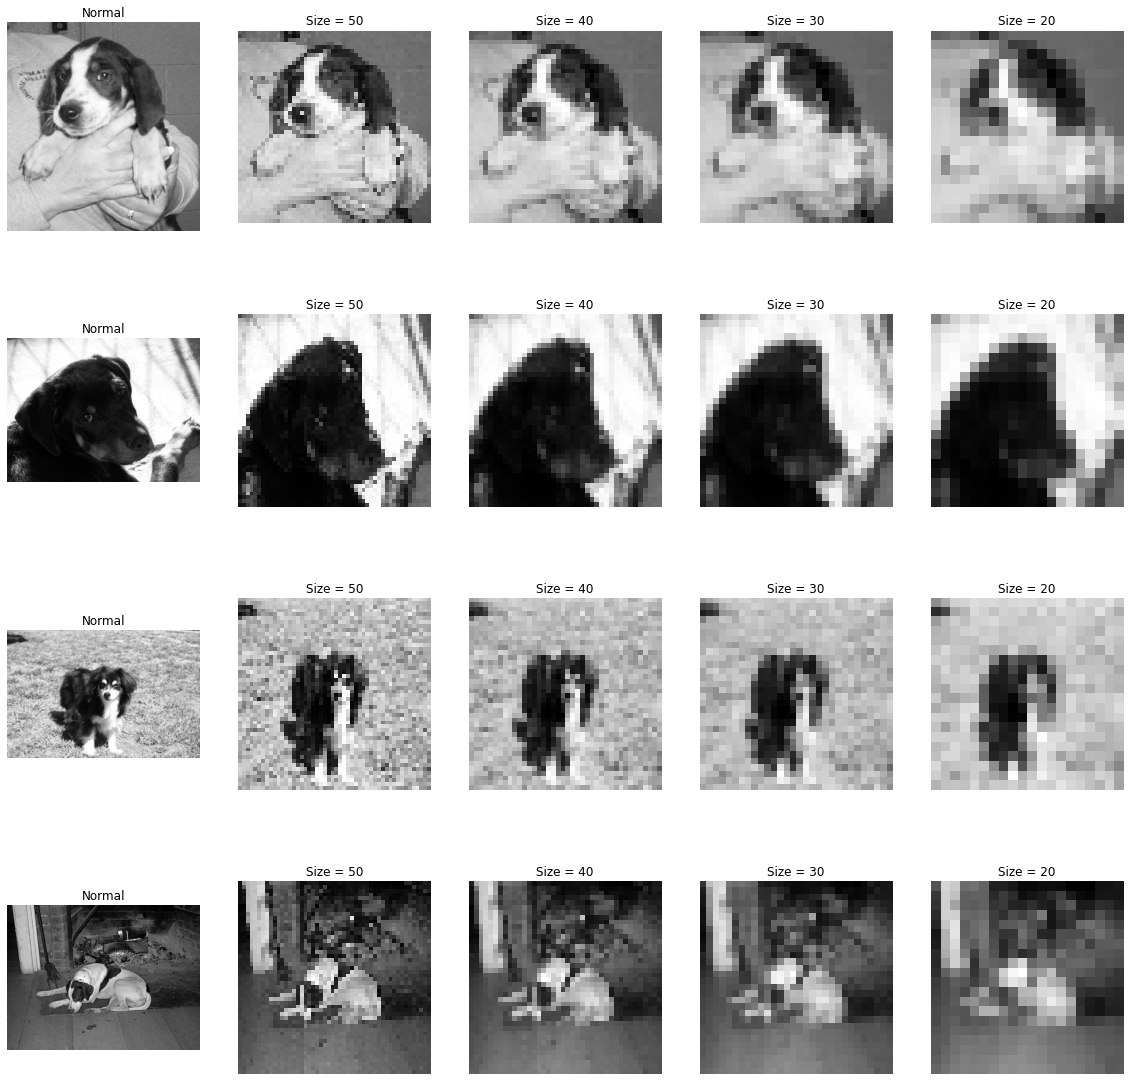

In [5]:
plt.figure(figsize=(20,20))
for i in range(1,20,5):
    plt.subplot(4,5, i)
    plt.axis('off')
    img = cv2.imread('csv folder/train/dog.{}.jpg'.format(i+9),0 )
    plt.imshow(img, cmap ='gray')
    plt.title("Normal")
    
    plt.subplot(4,5, i+1)
    plt.axis('off')
    plt.title("Size = 50")
    img = cv2.resize(img , (50,50)) 
    plt.imshow(img, cmap ='gray')
    
    plt.subplot(4,5, i+2)
    plt.axis('off')
    plt.title("Size = 40")
    img = cv2.resize(img , (40,40)) 
    plt.imshow(img, cmap ='gray')
    
    plt.subplot(4,5, i+3)
    plt.axis('off')
    plt.title("Size = 30")
    img = cv2.resize(img , (30,30)) 
    plt.imshow(img, cmap ='gray')
    
    plt.subplot(4,5, i+4)
    plt.axis('off')
    plt.title("Size = 20")
    img = cv2.resize(img , (20,20)) 
    plt.imshow(img, cmap ='gray')

Size 50 and 40 is still easy to understand if its a dog or cat, size 30 is already a bit hard and size 20 is very hard. so lets try to find something between 30 and 40

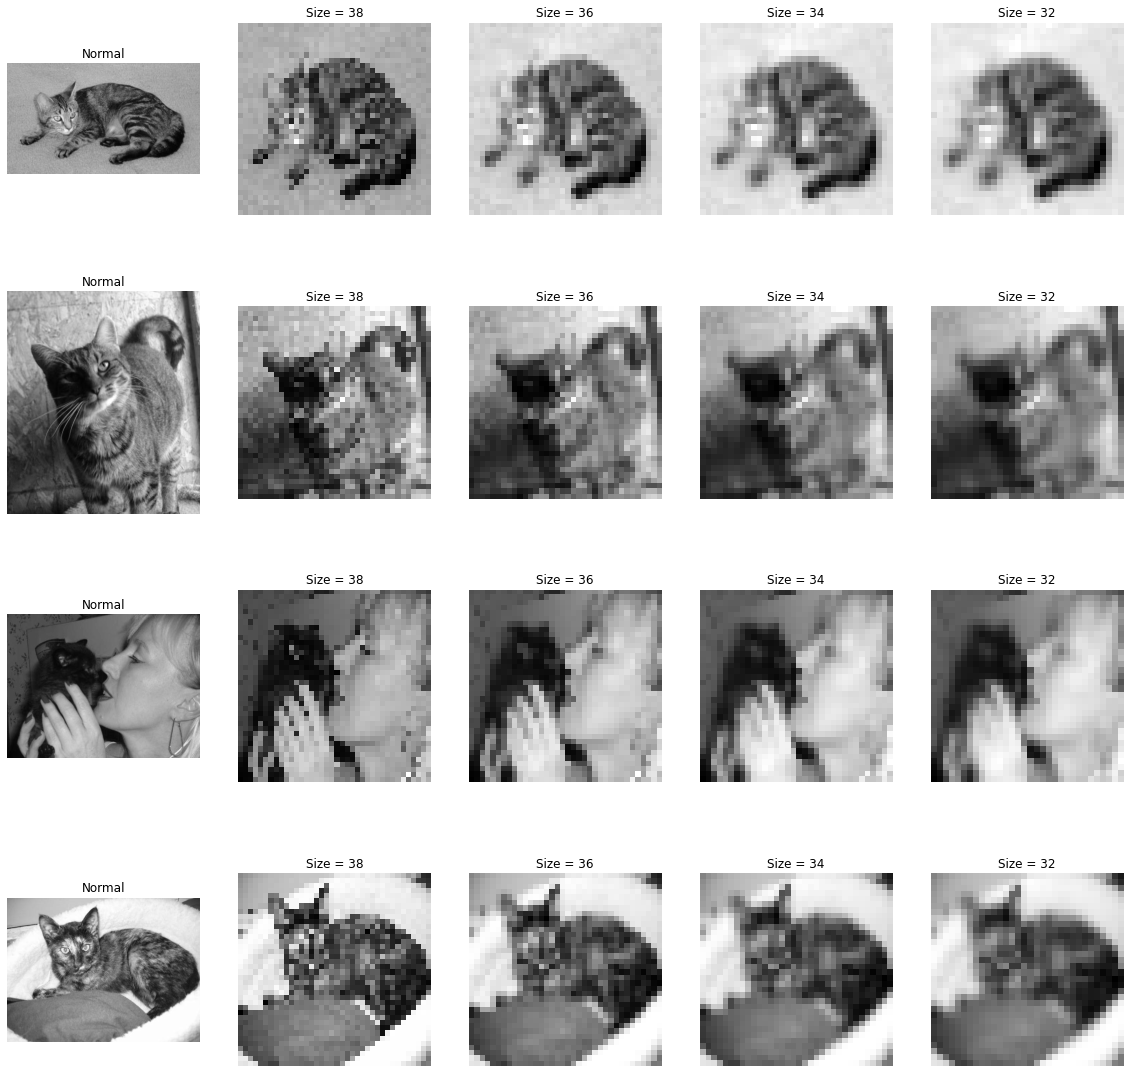

In [18]:
plt.figure(figsize=(20,20))
for i in range(1,20,5):
    plt.subplot(4,5, i)
    plt.axis('off')
    img = cv2.imread('csv folder/train/cat.{}.jpg'.format(i+15),0 )
    plt.imshow(img, cmap ='gray')
    plt.title("Normal")
    
    plt.subplot(4,5, i+1)
    plt.axis('off')
    plt.title("Size = 38")
    img = cv2.resize(img , (38,38)) 
    plt.imshow(img, cmap ='gray')
    
    plt.subplot(4,5, i+2)
    plt.axis('off')
    plt.title("Size = 36")
    img = cv2.resize(img , (36,36)) 
    plt.imshow(img, cmap ='gray')
    
    plt.subplot(4,5, i+3)
    plt.axis('off')
    plt.title("Size = 34")
    img = cv2.resize(img , (34,34)) 
    plt.imshow(img, cmap ='gray')
    
    plt.subplot(4,5, i+4)
    plt.axis('off')
    plt.title("Size = 32")
    img = cv2.resize(img , (32,32)) 
    plt.imshow(img, cmap ='gray')

Size 38 seems to be the best because of how much details it has compared to the other sizes, but do we realy need that extra detailing of their fur?

I see two options:
1. We go with extra details and hope it will help it the model identify better by looking at the fur
2. We go with less detail so the model will concentrate more on the shape than the fur

I think option 2 is the better one, because we already went with black and white so we should go all the way.

So Lets go with size = 34 , in which its still possible to go by fur but eaiser to go by shape

### Making the data frame

In [208]:
path = "csv folder/train"
size = 33

In [116]:
def procces_image(img_path):
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img , (size,size))
    img = img.reshape(size*size)
    img = np.append(img,img.ravel().mean())
    return img

In [117]:
def load_data(path):
    x = []
    y = []

    for file in os.listdir(path):
        label = file.split('.')[-3]
        data = procces_image("{}/{}".format(path,file))
        x.append(data)
        y.append(label)
    return x,y

In [209]:
X,Y = load_data(path)
X = np.asarray(X)
Y = np.asarray(Y)

In [210]:
X.shape,Y.shape

((25000, 1090), (25000,))

With color

In [149]:
def procces_image_col(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img , (size,size))
    img = img.reshape(size*size*3)
    img = np.append(img,img.ravel().mean())
    return img

In [150]:
def load_data_col(path):
    x = []
    y = []

    for file in os.listdir(path):
        label = file.split('.')[-3]
        data = procces_image_col("{}/{}".format(path,file))
        x.append(data)
        y.append(label)
    return x,y

In [219]:
X,Y = load_data_col(path)
X = np.asarray(X)
Y = np.asarray(Y)

In [220]:
X.shape,Y.shape

((25000, 3268), (25000,))

## Create a Test set

In [23]:
from sklearn.model_selection import train_test_split

We will first compare the distrubtion of the Test and Training set to see if there is any bias.

Lets Start with the distibution of the training set:

And now we will make a comparison between the distrubtion of the training and test set

Okay now lets split the data

In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,shuffle=True ,random_state=42)

## Model Preproccesing

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

As each feature represents a pixel we cant add any new features and all existing features are numerical so no need to transform categorial features, only thinks left are using Pca and a scaler in addition a scaler is needed if we want to use pca (the data should be normalized before doing PCA)

### Preprocessing Pipeline

I choose Pca n_components=0.9 (we will lose 10% of the data)

In [38]:
pre_process = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=0.9))])

### Transforming the data

In [222]:
# we will preprocess the data
X_train_transformed = pre_process.fit_transform(X_train)
X_test_transformed = pre_process.transform(X_test)
X_train_transformed

array([[ 3.28017628e+01, -4.40040387e+00,  1.08566308e+01, ...,
         4.67435803e-01,  5.45057269e-01, -3.34619379e-01],
       [-1.07229165e+01,  2.25350246e+00,  1.02532594e+01, ...,
         7.98937527e-01, -7.49512028e-01, -5.17273550e-01],
       [-7.04340610e+00,  1.24553303e+01,  1.85765976e+01, ...,
         2.67971987e-02,  9.85004800e-01, -6.92276491e-01],
       ...,
       [-1.08536111e+01,  1.40632816e+01, -1.93535962e+01, ...,
         3.82452872e-03, -2.15527720e-01,  1.88604038e-01],
       [ 1.74562592e+01,  1.57336108e+01,  6.90042863e+00, ...,
         2.82412570e-01,  1.69886925e-01, -1.64302390e+00],
       [-2.87509579e+01,  2.86518940e+00, -1.73129793e+01, ...,
         2.81563033e-01,  5.96435272e-01, -5.36638270e-01]])

## Model Training

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### KNN

In [223]:
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train_transformed,Y_train)
Knn_score =  Knn.score(X_test_transformed,Y_test)
print("Accuracy: ",Knn_score)

Accuracy:  0.57504


### Logistic Regression

In [224]:
logR = LogisticRegression(random_state=42, n_jobs=-1)
logR.fit(X_train_transformed,Y_train)
logR_score =  logR.score(X_test_transformed,Y_test)
print("Accuracy: ",logR_score)

Accuracy:  0.60128


### Desicion Trees

In [225]:
dTree = DecisionTreeClassifier(random_state=42)
dTree.fit(X_train_transformed,Y_train)
dTree_score =  dTree.score(X_test_transformed,Y_test)
print("Accuracy: ",dTree_score)

Accuracy:  0.55136


### Random Forest

In [226]:
RFor = RandomForestClassifier(random_state=42)
RFor.fit(X_train_transformed,Y_train)
RFor_score =  RFor.score(X_test_transformed,Y_test)
print("Accuracy: ",RFor_score)

Accuracy:  0.60656


### Gradient boosting

In [227]:
gradB = GradientBoostingClassifier(random_state=42)
gradB.fit(X_train_transformed,Y_train)
gradB_score =  gradB.score(X_test_transformed,Y_test)
print("Accuracy: ",gradB_score)

Accuracy:  0.64752


### Ada Boosting

In [228]:
adaB = AdaBoostClassifier(dTree,random_state=42)
adaB.fit(X_train_transformed,Y_train)
adaB_score =  adaB.score(X_test_transformed,Y_test)
print("Accuracy: ",adaB_score)

Accuracy:  0.54448


### XG Boost

In [ ]:
xgB = XGBClassifier(random_state=42,n_jobs=-1)
xgB.fit(X_train_transformed,Y_train)
xgB_score =  xgB.score(X_test_transformed,Y_test)
print("Accuracy: ",xgB_score)

### Stacking

In [ ]:
estimators=[
    ('Knn',Knn),
    ('Logistic Regression',logR),
    ('Random Forest',RFor),
    ('Gradient Boosting',gradB)]
Stk = StackingClassifier(estimators = estimators,final_estimator=xgB)
Stk.fit(X_train_transformed,Y_train)

Stk_score =  Stk.score(X_test_transformed,Y_test)
PredicStk = Stk.predict(X_test_transformed)
#evaluate predictions
confmat = confusion_matrix(Y_test, PredicStk)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(Y_test, PredicStk)
acc_score1 = accuracy_score(Y_test, PredicStk)
print(class_rep1)
print("Accuracy: ", acc_score1)

## Model Evaluation

This data set has all result of Model Training in an orderly manner

In [ ]:
Scores = pd.DataFrame({
    'Model':['KNeighborsClassifier','LogisticRegressionClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostClassifier','AdaBoostClassifier','XGBoostClassifier','StackingClassifier'],
    'Accuracy':[Knn_score,logR_score,dTree_score,RFor_score,gradB_score,adaB_score,xgB_score,Stk_score]})
Scores

So lets look at which classifier is the best

### Conclusion